# Results for the report

In [1]:
import errors
import wolff
import metropolis
import evolution
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize.minpack import curve_fit
import sys
sys.setrecursionlimit(10000000)

### Example of how to run a simulation

In [20]:
# Define simulation parameters
size = 50
T_i = 1
T_f = 1.5
step = 0.01

In [21]:
# Execute Wolff algorithm
frames_w, obs_w = evolution.evolution(f=wolff.wolff_evolution,
                                                      relax=10,
                                                      L=size,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)

In [22]:
# Execute Metropolis algorithm
frames_m, obs_m = evolution.evolution(f=metropolis.metropolis_evolution,
                                                      relax=6000,
                                                      L=size,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)

In [23]:
# Save Wolff observables
temps_m_w, m_w, error_m_w, tau_m_w = obs_w[0]
temps_cv_w, cv_w, error_cv_w, tau_cv_w = obs_w[1]
temps_s_w, s_w, error_s_w, tau_s_w = obs_w[2]

In [24]:
# Save Metropolis observables
temps_m_m, m_m, error_m_m, tau_m_m = obs_m[0]
temps_cv_m, cv_m, error_cv_m, tau_cv_m = obs_m[1]
temps_m_s, s_m, error_s_m, tau_s_m = obs_m[2]

Text(0.5, 1.0, 'Magnetization: J=1, H=0')

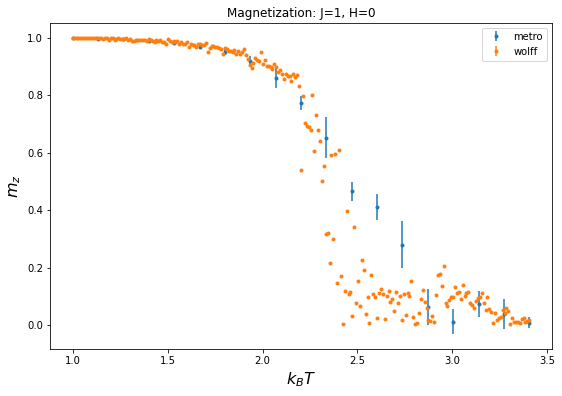

In [25]:
# Plot magnetization
plt.figure(figsize=(9,6))
plt.errorbar(temps_m_m,abs(m_m),yerr=error_m_m,fmt='o',markersize=3,label='metro')
plt.errorbar(temps_m_w,abs(m_w),yerr=error_m_w,fmt='o',markersize=3,label='wolff')
plt.legend()
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$m_z$',fontsize=16)
plt.title('Magnetization: J=1, H=0')

## Metropolis algorithm
# Magnetization
We will study the following parameters:
* Lattice size
* Number of relaxation steps
* Phase diagram w.r.t. $k_BT$ and $h$

In [32]:
# Define variables to evaluate and store

T_i = 0.75
T_f = 1.5
step = 0.01
T_c = 2.27

lengths = [10, 20, 40, 80, 100, 150]
magnets = []
suscepts = []
cvs = []

# Run simulation for different system sizes
for length in lengths:
    _, obs_m = evolution.evolution(f=metropolis.metropolis_evolution,
                                                      relax=6000,
                                                      L=length,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)
    # Save data
    magnets.append(obs_m[0])
    cvs.append(obs_m[1])
    suscepts.append(obs_m[2])

/home/student/Project-2---Ising_juandaanieel_kwo/scripts/errors.py:37: RuntimeWarning: invalid value encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)


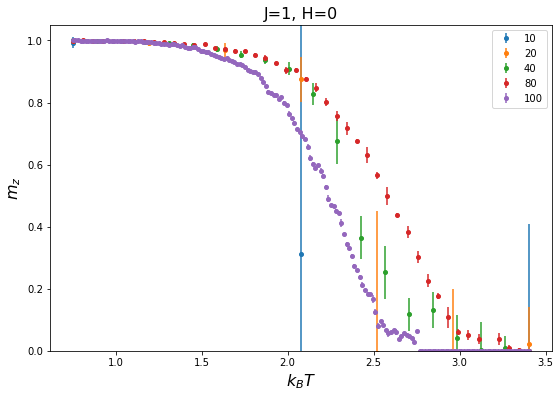

In [3]:
plt.figure(figsize=(9,6))
for mag in magnets:
    plt.errorbar(mag[0], mag[1], yerr=mag[2], fmt='o', markersize=4)
plt.legend(lengths)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$m_z$',fontsize=16)
plt.title('J=1, H=0',fontsize=16)
plt.ylim(0,1.05)
plt.savefig(f"../simulation_images/metropolis_size_dependence.pdf",  bbox_inches='tight')

Text(0.5, 1.0, 'J=1, H=0')

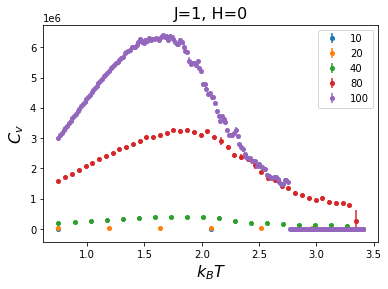

In [4]:
#plt.figure(figsize=(9,6))
for mag in cvs:
    plt.errorbar(mag[0], mag[1], yerr=mag[2], fmt='o', markersize=4)
plt.legend(lengths)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$C_v$',fontsize=16)
plt.title('J=1, H=0',fontsize=16)

Text(0.5, 1.0, 'J=1, H=0')

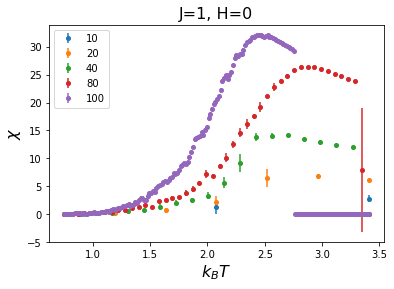

In [31]:
#plt.figure(figsize=(9,6))
for mag in suscepts:
    plt.errorbar(mag[0], mag[1], yerr=mag[2], fmt='o', markersize=4)
plt.legend(lengths)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$\chi$',fontsize=16)
plt.title('J=1, H=0',fontsize=16)

<ipython-input-6-4b5635549ae9>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  taus.append(np.array(mag)[3])
<ipython-input-6-4b5635549ae9>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  error_taus.append(np.array(mag)[4])


<ErrorbarContainer object of 3 artists>

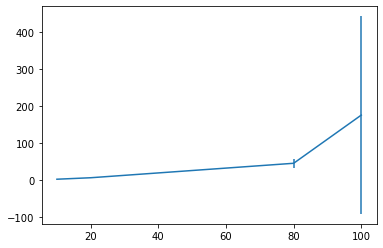

In [6]:
taus = []
error_taus = []
for mag in magnets:
    taus.append(np.array(mag)[3])
    error_taus.append(np.array(mag)[4])
taus
plt.errorbar(lengths,taus,yerr=np.concatenate(error_taus))

### Fitting of observables around the critical temperature

In [24]:
_, obs = evolution.evolution(f=metropolis.metropolis_evolution,
                                                      relax=6000,
                                                      L=150,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)


/home/student/Project-2---Ising_juandaanieel_kwo/scripts/errors.py:37: RuntimeWarning: invalid value encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)
/home/student/Project-2---Ising_juandaanieel_kwo/scripts/errors.py:35: RuntimeWarning: invalid value encountered in sqrt
  sigma_A_n = np.sqrt((N-time)*np.sum(A_nn**2)-(np.sum(A_nn)**2))


In [25]:
def func_critical_sus(x,l,b):
    return abs((x-b)/b)**(-l)

In [26]:
susceptibility = obs_m[2]
red_t = (susceptibility[0]-2.27)/2.27

In [28]:
curve_fit(func_critical_sus, red_t, susceptibility[1])

(array([157368.81103859,  18278.56693519]),
 array([[3.50665448e+14, 4.07295303e+13],
        [4.07295303e+13, 4.73070464e+12]]))

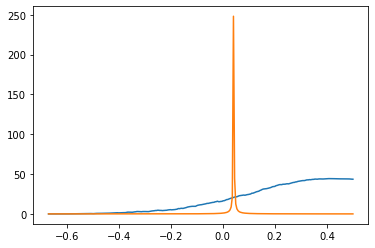

In [30]:
plt.plot(red_t,susceptibility[1])
plt.plot(red_t, func_critical_sus(red_t,1.5,  0.0420504))

# Wolff Algorithm

In [ ]:
# Define variables to evaluate and store

T_i = 0.75
T_f = 1.5
step = 0.01

lengths = [10, 20, 40, 80, 100]
magnets = []
suscepts = []
cvs = []

# Run simulation for different system sizes
for length in lengths:
    _, obs_m = evolution.evolution(f=wolff.wolff_evolution,
                                                      relax=6000,
                                                      L=length,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)
    # Save data
    magnets.append(obs_m[0])
    cvs.append(obs_m[1])
    suscepts.append(obs_m[2])

In [47]:
# Define variables to evaluate and store

T_i = 1
T_f = 1.5
step = 0.005
size = 50

relax = np.arange(1000,10000,step=2000)
magnets = []
suscepts = []
cvs = []

# Run simulation for different system sizes
for length in relax:
    _, obs_m = evolution.evolution(f=metropolis.metropolis_evolution,
                                                      relax=length,
                                                      L=size,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)
    # Save data
    magnets.append(obs_m[0])
    cvs.append(obs_m[1])
    suscepts.append(obs_m[2])

(1.5, 4.5)

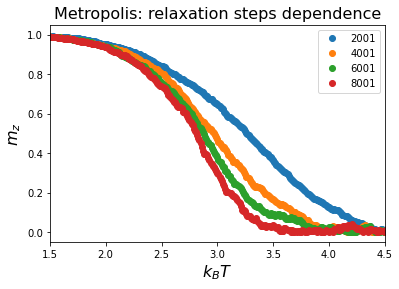

In [54]:
plt.plot(T,np.transpose(magnets[1:]),'o')
plt.legend(relax[1:])
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$m_z$',fontsize=16)
plt.title('Metropolis: relaxation steps dependence',fontsize=16)
plt.xlim(1.5,4.5)

In [ ]:
plt.scatter(relax,taus_magnets)

In [2]:
fields = np.arange(-1,1,step=0.25)
phase_diagram = []
for h in fields:
    print(h)
    _, obsers_relax, T_relax = evolution.evolution(f=metropolis.metropolis_evolution,relax=2000,L=50,T_init=0.1,T_max=2,dT=0.01,h=h)
    phase_diagram.append(obsers_relax[0])

NameError: name 'np' is not defined

In [6]:
x,y = np.meshgrid(T_relax,fields)

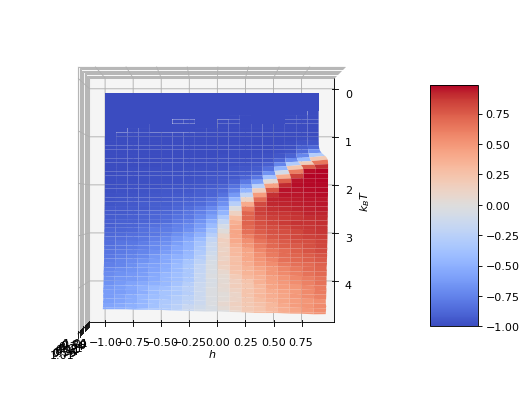

In [7]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=80)

# Plot the surface.
surf = ax.plot_surface(x,y,np.array(phase_diagram), cmap=cm.coolwarm)
plt.xlabel(r'$k_B T$')
plt.ylabel(r'$h$')
# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(azim=0, elev=90)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()